# **Task 1**

In [1]:
# Binary Tree Node
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [2]:
# DFS
def dfs(root):
    if root is None:
        return []

    stack, result = [root], []
    while stack:
        node = stack.pop()
        result.append(node.value)
        if node.right:
            stack.append(node.right)
        if node.left:
            stack.append(node.left)
    return result

In [3]:
# BFS
from collections import deque

def bfs(root):
    if root is None:
        return []
    queue = deque([root])
    result = []
    while queue:
        node = queue.popleft()
        result.append(node.value)
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return result

In [4]:
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.right = Node(6)

print("DFS:", dfs(root))
print("BFS:", bfs(root))


DFS: [1, 2, 4, 5, 3, 6]
BFS: [1, 2, 3, 4, 5, 6]


# **Task 2**

In [16]:
from binarytree import tree
from anytree import Node, RenderTree
from collections import deque

# Generating random tree of height 3

btree = tree(height=3, is_perfect=False)
print("Generated Binary Tree (binarytree library):")
print(btree)


Generated Binary Tree (binarytree library):

      _______1_____
     /             \
  __13__           _14
 /      \         /   \
9        7       11    5
 \      / \     /
  3    8   2   4



In [17]:
# Converting to anytree
def convert_to_anytree(bnode):
    if bnode is None:
        return None
    node = Node(str(bnode.value))
    if bnode.left:
        node.left = convert_to_anytree(bnode.left)
        node.left.parent = node
    if bnode.right:
        node.right = convert_to_anytree(bnode.right)
        node.right.parent = node
    return node

# Root of anytree
anytree_root = convert_to_anytree(btree)

print("\nEquivalent Tree (anytree visualization):")
for pre, fill, node in RenderTree(anytree_root):
    print("%s%s" % (pre, node.name))



Equivalent Tree (anytree visualization):
1
├── 13
│   ├── 9
│   │   └── 3
│   └── 7
│       ├── 8
│       └── 2
└── 14
    ├── 11
    │   └── 4
    └── 5


# **Task 3**

In [18]:
# Applying BFS and DFS on binarytree
bfs_path = bfs(btree)
dfs_path = dfs(btree)

print("\nTraversal Paths:")
print("BFS Path:", bfs_path)
print("DFS Path:", dfs_path)


Traversal Paths:
BFS Path: [1, 13, 14, 9, 7, 11, 5, 3, 8, 2, 4]
DFS Path: [1, 13, 9, 3, 7, 8, 2, 14, 11, 4, 5]


# Task **4**

In [29]:
# Benchmarking
heights = [4, 6, 8]
results = []

print(f"{'Height':<10}{'Nodes':<10}{'BFS Time (s)':<15}{'DFS Time (s)':<15}")
print("-" * 50)

for h in heights:
    btree = tree(height=h, is_perfect=False)   # random binary tree
    num_nodes = btree.size                     # number of actual nodes

    start = time.time()
    bfs(btree)
    bfs_time = time.time() - start

    start = time.time()
    dfs(btree)
    dfs_time = time.time() - start

    results.append((h, num_nodes, bfs_time, dfs_time))
    print(f"{h:<10}{num_nodes:<10}{bfs_time:<15.6f}{dfs_time:<15.6f}")


Height    Nodes     BFS Time (s)   DFS Time (s)   
--------------------------------------------------
4         23        0.000062       0.000030       
6         99        0.000141       0.000141       
8         221       0.000958       0.000927       


# **Task 5**

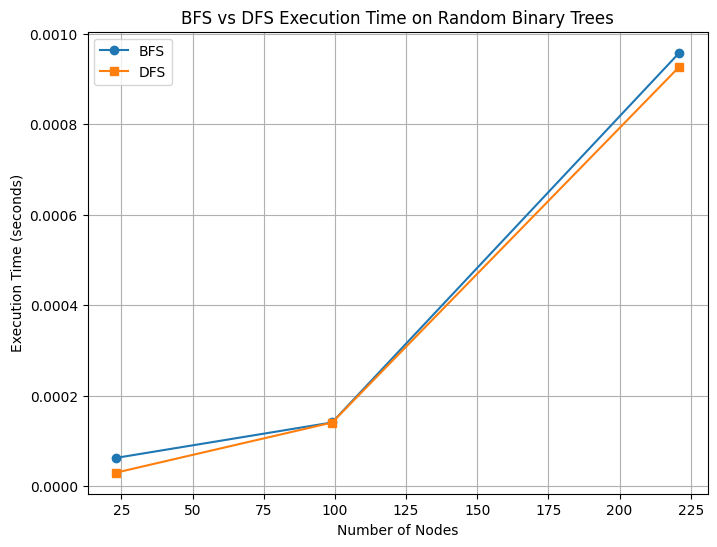

In [30]:
# Plotting time complexity

import matplotlib.pyplot as plt

nodes, bfs_times, dfs_times = zip(*[(n, bfs_t, dfs_t) for _, n, bfs_t, dfs_t in results])

plt.figure(figsize=(8, 6))
plt.plot(nodes, bfs_times, marker='o', label="BFS")
plt.plot(nodes, dfs_times, marker='s', label="DFS")

plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.title("BFS vs DFS Execution Time on Random Binary Trees")
plt.legend()
plt.grid(True)
plt.show()